In [14]:
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DATASETS/Iris.csv")

In [11]:
iris = datasets.load_iris()
x = df.iloc[:, 1:5]
y = iris.target

In [8]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Text(0, 0.5, 'Sepal Width')

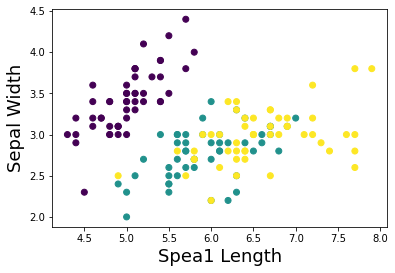

In [13]:
plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=y)
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

In [23]:
params = {'n_clusters':range(1,100), 'n_init':range(1,10)}
gs = GridSearchCV(KMeans(), params, n_jobs=-1, verbose=1)
best_model = gs.fit(x)

Fitting 5 folds for each of 891 candidates, totalling 4455 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 2192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2892 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3792 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4455 out of 4455 | elapsed:  5.7min finished


In [24]:
best_model.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=99, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
model = best_model.best_estimator_.fit(x)

In [20]:
print(model.cluster_centers_)

[[6.02777778 2.73333333 5.02777778 1.79444444]
 [5.25555556 3.67037037 1.5037037  0.28888889]
 [7.475      3.125      6.3        2.05      ]
 [5.         2.3        3.275      1.025     ]
 [5.96875    2.8625     4.4125     1.38125   ]
 [6.65454545 3.04545455 4.66363636 1.47272727]
 [6.56818182 3.08636364 5.53636364 2.16363636]
 [5.57647059 2.59411765 3.98235294 1.21764706]
 [4.71304348 3.12173913 1.4173913  0.19130435]]


Text(0.5, 1.0, 'Predicted')

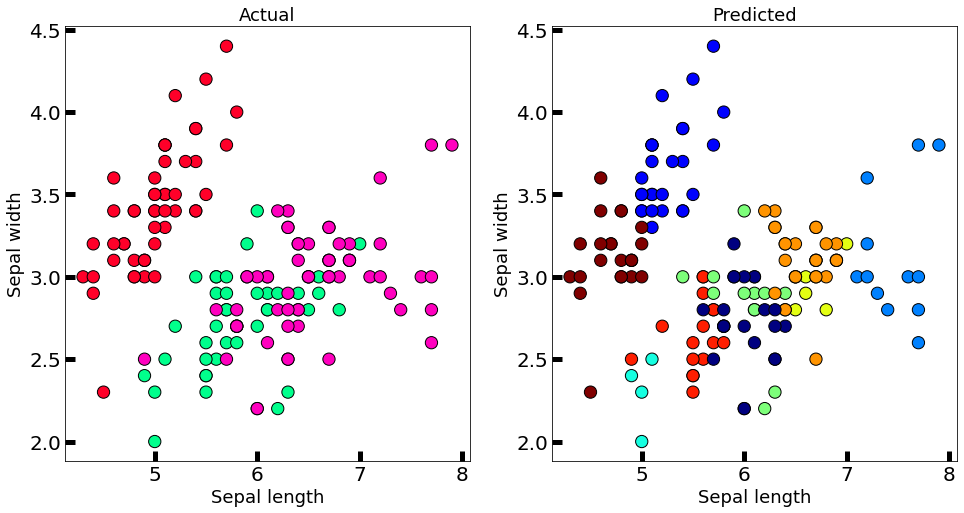

In [22]:
#this will tell us to which cluster does the data observations belong.
new_labels = model.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [25]:
# Grid search not working 

In [27]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

Text(0.5, 1.0, 'Predicted')

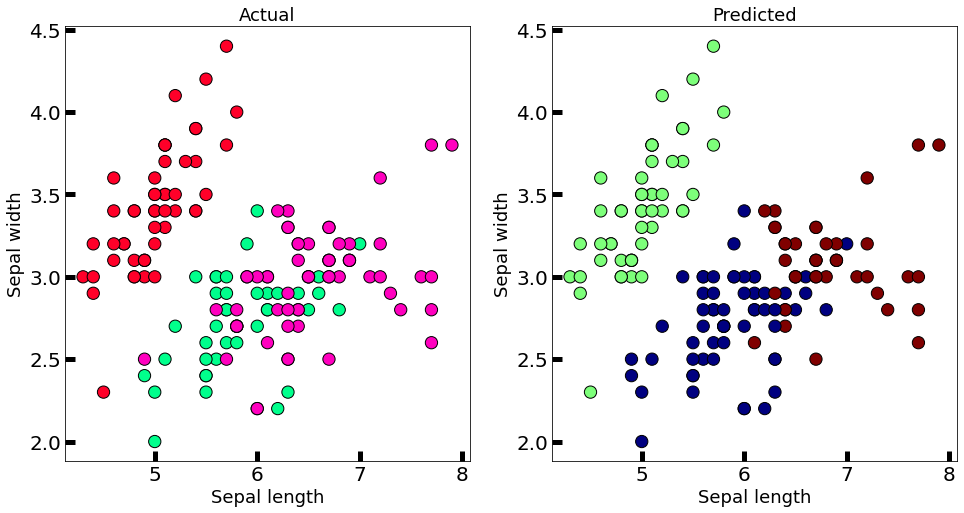

In [28]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=y, cmap='gist_rainbow',
edgecolor='k', s=150)
axes[1].scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=new_labels, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)